In [1]:
# Load all neccessary libraries and read the file
# The file is Seattle AirBnB Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
%matplotlib inline

calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')

In [2]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [3]:
# Date column is converted to the right format
calendar['date'] =  pd.to_datetime(calendar['date'], format='%Y-%m-%d')

In [4]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
len(calendar.listing_id.unique())
#There are 3818 listed properties

3818

In [7]:
#Check for the start and end date on record
print(min(calendar.date)) #Jan 4 2016
print(max(calendar.date)) #Jan 2 2017

2016-01-04 00:00:00
2017-01-02 00:00:00


In [8]:
# Extract Month and Year into one column
# Extract Date of the Month into another
# Extract Day of the week into another column
calendar['Month'] = calendar['date'].dt.month
calendar['Year'] = calendar['date'].dt.year
calendar['Day'] = calendar['date'].dt.weekday

In [9]:
calendar.head()

,listing_id,date,available,price,Month,Year,Day
0,241032,2016-01-04,t,$85.00,1,2016,0
1,241032,2016-01-05,t,$85.00,1,2016,1
2,241032,2016-01-06,f,NaN,1,2016,2
3,241032,2016-01-07,f,NaN,1,2016,3
4,241032,2016-01-08,f,NaN,1,2016,4


In [10]:
# Create Dictionary matching Months in Numbers to Text
Months = {1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# Replace the respective numbers by Text
calendar['Month'].replace(Months, inplace=True)

In [11]:
calendar.head()

,listing_id,date,available,price,Month,Year,Day
0,241032,2016-01-04,t,$85.00,Jan,2016,0
1,241032,2016-01-05,t,$85.00,Jan,2016,1
2,241032,2016-01-06,f,NaN,Jan,2016,2
3,241032,2016-01-07,f,NaN,Jan,2016,3
4,241032,2016-01-08,f,NaN,Jan,2016,4


In [12]:
#To check if all listing id have entries for each day
# I first group data by listing id and size
ListedDays = calendar.groupby('listing_id').size()
# Then I check for the maximum and minimum value
print(ListedDays.values.max())
print(ListedDays.values.min())

365
365


In [13]:
# Goodled 2016-01-04, and found that it is a monday.
# Create Dictionary to map weekdays
Weekday = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
calendar['Day'].replace(Weekday, inplace=True)

In [14]:
calendar.head()

,listing_id,date,available,price,Month,Year,Day
0,241032,2016-01-04,t,$85.00,Jan,2016,Mon
1,241032,2016-01-05,t,$85.00,Jan,2016,Tue
2,241032,2016-01-06,f,NaN,Jan,2016,Wed
3,241032,2016-01-07,f,NaN,Jan,2016,Thu
4,241032,2016-01-08,f,NaN,Jan,2016,Fri


In [ ]:
## Question 1 : Are the total number of listings similar each week day?

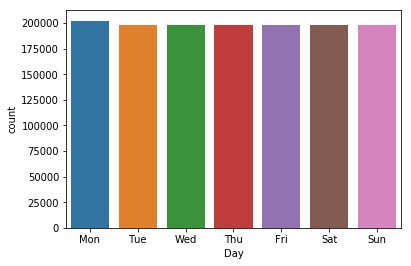

In [15]:
sns.countplot(calendar.Day)

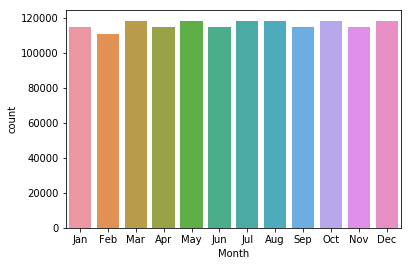

In [16]:
## Question 2 : Are the total number of listings similar each month?
sns.countplot(calendar.Month)

In [17]:
# Question 3, Does Utililzation vary by weekday?
# Utilization defined as the ratio of Filled listings vs Total Listings
WkDayUtil = calendar.groupby(['Day','available']).size().unstack()
WkDayUtil

available,f,t
Day,,
Fri,65733,132803
Mon,66554,135800
Sat,65962,132574
Sun,64921,133615
Thu,65568,132968
Tue,65129,133407
Wed,65161,133375


In [18]:
# Rename column for easy use and add a new column to measure utilization in percentages
WkDayUtil.columns = ['NotAvail','Avail']
WkDayUtil.reset_index(inplace=True)
WkDayUtil['Utilization'] = round((WkDayUtil['NotAvail']/(WkDayUtil['NotAvail']+WkDayUtil['Avail']))*100,1)
WkDayUtil

,Day,NotAvail,Avail,Utilization
0,Fri,65733,132803,33.1
1,Mon,66554,135800,32.9
2,Sat,65962,132574,33.2
3,Sun,64921,133615,32.7
4,Thu,65568,132968,33.0
5,Tue,65129,133407,32.8
6,Wed,65161,133375,32.8


In [19]:
Days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
WkDayUtil['Day'] = pd.Categorical(WkDayUtil['Day'], categories = Days, ordered= True)
WkDayUtil.sort_values(by='Day', inplace=True)

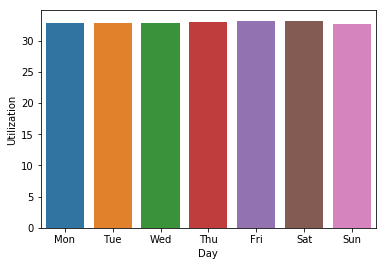

In [20]:
sns.barplot(x="Day", y="Utilization",data=WkDayUtil)

In [21]:
# All days have roughly the same level of utilization percentages
# They are all about 33%
# Questio  4: Is Utilization the same for each Month?
MonthUtil = calendar.groupby(['Month','available']).size().unstack()
MonthUtil.head()

available,f,t
Month,,
Apr,38503,76037
Aug,42011,76347
Dec,31297,87061
Feb,37401,73321
Jan,49603,64937


In [22]:
MonthUtil.columns = ['NotAvail','Avail']
MonthUtil.reset_index(inplace=True)
MonthUtil['Utilization'] = round((MonthUtil['NotAvail']/(MonthUtil['NotAvail']+MonthUtil['Avail']))*100,1)
MonthUtil.head()

,Month,NotAvail,Avail,Utilization
0,Apr,38503,76037,33.6
1,Aug,42011,76347,35.5
2,Dec,31297,87061,26.4
3,Feb,37401,73321,33.8
4,Jan,49603,64937,43.3


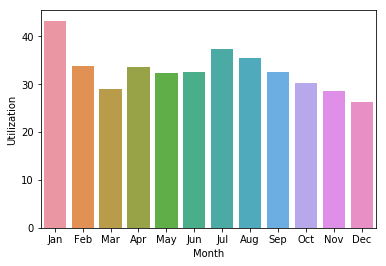

In [23]:
# Looks Like Utilization varies by month, let's visualize it.
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
MonthUtil['Month'] = pd.Categorical(MonthUtil['Month'], categories = Months, ordered= True)
MonthUtil.sort_values(by='Month', inplace=True)
sns.barplot(x="Month", y="Utilization",data=MonthUtil)

In [24]:
# Eye test suggests that utilization varies by Month of the year
# January has the highest and December the lowest

In [25]:
# Next I'll look at the listings data.
# First I select a few columns
listings = listings[['beds', 'bed_type','bedrooms','property_type','amenities','price','neighbourhood','cancellation_policy']]

In [29]:
# Question 5: Is cancellation policy dependent on number of bedrooms?
CancellationPolicy = listings.groupby(['bedrooms','cancellation_policy']).size().unstack().fillna(0)

In [30]:
CancellationPolicy.head()

cancellation_policy,flexible,moderate,strict
bedrooms,,,
0.0,111.0,159.0,102.0
1.0,859.0,804.0,754.0
2.0,117.0,185.0,338.0
3.0,49.0,78.0,156.0
4.0,11.0,19.0,39.0


In [31]:
CancellationPolicy.columns = ['flexible','moderate','strict']
CancellationPolicy.reset_index(inplace= True)

In [32]:
CancellationPolicy.head()

,bedrooms,flexible,moderate,strict
0,0.0,111.0,159.0,102.0
1,1.0,859.0,804.0,754.0
2,2.0,117.0,185.0,338.0
3,3.0,49.0,78.0,156.0
4,4.0,11.0,19.0,39.0


In [49]:
CancellationPolicy['StrictOrNot'] = CancellationPolicy.strict / (CancellationPolicy.flexible + CancellationPolicy.moderate)
CancellationPolicy

,bedrooms,flexible,moderate,strict,StrictOrNot
0,0.0,111.0,159.0,102.0,0.377778
1,1.0,859.0,804.0,754.0,0.453397
2,2.0,117.0,185.0,338.0,1.119205
3,3.0,49.0,78.0,156.0,1.228346
4,4.0,11.0,19.0,39.0,1.300000
5,5.0,3.0,4.0,17.0,2.428571
6,6.0,0.0,0.0,6.0,inf
7,7.0,0.0,0.0,1.0,inf


In [ ]:
## As seen in the table above, Cancellation Policy become more strict as the number of bedrooms increase.